In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [55]:
in_path = "final_data/outputs/parsed/param_que_synth_11_8_21.json"
out_path = "final_data/outputs/parsed/param_que_synth_11_8_21.csv"

In [56]:
f = open(in_path, "r")

In [57]:
data = json.load(f)

In [58]:
data = pd.DataFrame(data["data"])

In [59]:
# data['likelihood_proper'] = np.exp(-data['likelihood'])
data["configuration"] = [f"{a}_{b}_{c}" for a,b,c in zip(data["alpha_q"], data["alpha_a"], data["beta"])]
data.set_index("configuration", inplace=True)
data

,questionerType,alpha_q,alpha_a,beta,likelihood
configuration,,,,,
3_1_0.5,pragmatic,3,1,0.5,-138.115144
3_1_0.5,explicit,3,1,0.5,-139.899518
3_1_0.1,pragmatic,3,1,0.1,-138.370025
3_1_0.1,explicit,3,1,0.1,-140.302376
3_1_1.5,pragmatic,3,1,1.5,-137.289846
...,...,...,...,...,...
19_7_1.5,explicit,19,7,1.5,-93.791002
19_7_2.0,pragmatic,19,7,2.0,-88.853654
19_7_2.0,explicit,19,7,2.0,-93.749903


In [60]:
data.to_csv(out_path)

In [61]:
sns.kdeplot("likelihood" , hue="answererType", data=data)
# sns.kdeplot("likelihood" , hue="questionerType", data=data)

ValueError: Could not interpret value `answererType` for parameter `hue`

<AxesSubplot:xlabel='alpha_q', ylabel='likelihood'>

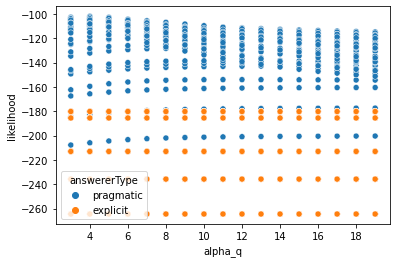

In [72]:
sns.scatterplot(x="alpha_q", y="likelihood", hue="answererType", data=data)
# sns.scatterplot(x="alpha_q", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='alpha_q', ylabel='likelihood'>

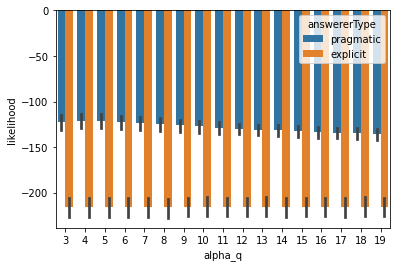

In [73]:
sns.barplot(x="alpha_q", y="likelihood", hue="answererType", data=data)
# sns.barplot(x="alpha_q", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='alpha_a', ylabel='likelihood'>

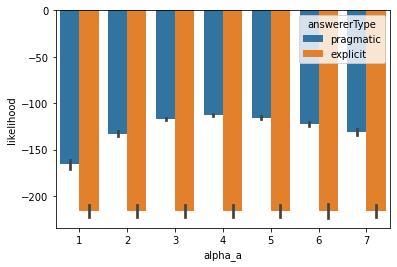

In [74]:
sns.barplot(x="alpha_a", y="likelihood", hue="answererType", data=data)
# sns.barplot(x="alpha_a", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='beta', ylabel='likelihood'>

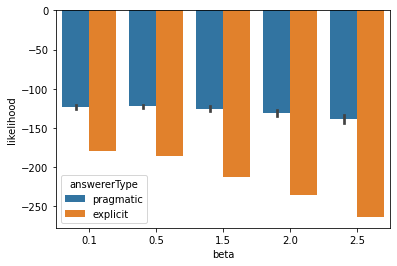

In [75]:
sns.barplot(x="beta", y="likelihood", hue="answererType", data=data)
# sns.barplot(x="beta", y="likelihood", hue="questionerType", data=data)

/Users/aditya/.pyenv/versions/3.8.6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alpha_q', ylabel='count'>

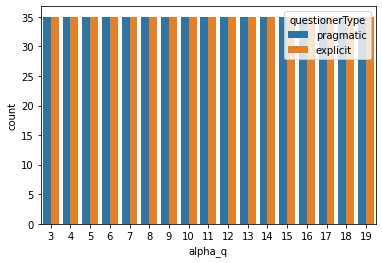

In [16]:
# sns.countplot("alpha_q" , hue="answererType", data=data)
sns.countplot("alpha_q" , hue="questionerType", data=data)

In [17]:
# sns.countplot("alpha_a" , hue="answererType", data=data)

In [18]:
# sns.countplot("beta" , hue="answererType", data=data)

In [19]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(x="alpha_q", y="alpha_a", size="likelihood", hue="beta", data=data[data.answererType=="pragmatic"])

In [67]:
# scatter = data[data.answererType=='pragmatic'].groupby(["alpha_q", "alpha_a"]).agg({"likelihood":"mean"}).reset_index()  

scatter = data[data.questionerType=='explicit'].groupby(["alpha_q", "alpha_a"]).agg({"likelihood":"mean"}).reset_index()  

In [68]:
scatter = scatter.pivot("alpha_a", "alpha_q", "likelihood")
scatter

alpha_q,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
alpha_a,,,,,,,,,,,,,,,,,
1,-138.782357,-128.848931,-121.193009,-115.39861,-111.003309,-107.612287,-104.93356,-102.767114,-100.980345,-99.485502,-98.223317,-97.152289,-96.242024,-95.469199,-94.815135,-94.264335,-93.803594
2,-138.782357,-128.848931,-121.193009,-115.39861,-111.003309,-107.612287,-104.93356,-102.767114,-100.980345,-99.485502,-98.223317,-97.152289,-96.242024,-95.469199,-94.815135,-94.264335,-93.803594
3,-138.782357,-128.848931,-121.193009,-115.39861,-111.003309,-107.612287,-104.93356,-102.767114,-100.980345,-99.485502,-98.223317,-97.152289,-96.242024,-95.469199,-94.815135,-94.264335,-93.803594
4,-138.782357,-128.848931,-121.193009,-115.39861,-111.003309,-107.612287,-104.93356,-102.767114,-100.980345,-99.485502,-98.223317,-97.152289,-96.242024,-95.469199,-94.815135,-94.264335,-93.803594
5,-138.782357,-128.848931,-121.193009,-115.39861,-111.003309,-107.612287,-104.93356,-102.767114,-100.980345,-99.485502,-98.223317,-97.152289,-96.242024,-95.469199,-94.815135,-94.264335,-93.803594
6,-138.782357,-128.848931,-121.193009,-115.39861,-111.003309,-107.612287,-104.93356,-102.767114,-100.980345,-99.485502,-98.223317,-97.152289,-96.242024,-95.469199,-94.815135,-94.264335,-93.803594
7,-138.782357,-128.848931,-121.193009,-115.39861,-111.003309,-107.612287,-104.93356,-102.767114,-100.980345,-99.485502,-98.223317,-97.152289,-96.242024,-95.469199,-94.815135,-94.264335,-93.803594


In [69]:
def true_point(x,y):
    x = x-2.5
    y = y-0.5
    return (x,y)

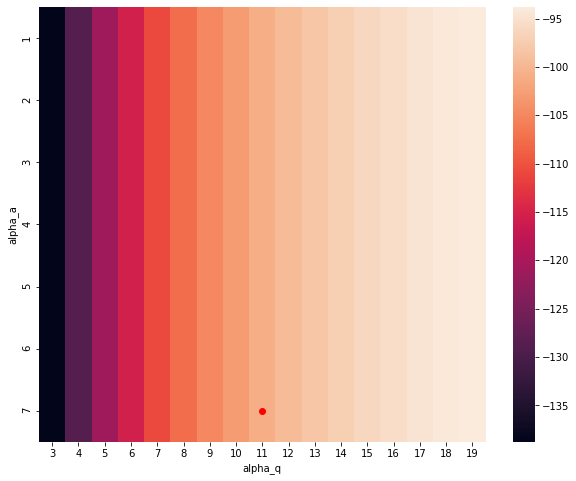

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(ylim = (1,7), xlim = (3,19))
sns.heatmap(scatter, ax=ax)
x, y = true_point(11, 7)
plt.plot(x, y, "ro")

/Users/aditya/.pyenv/versions/3.8.6/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


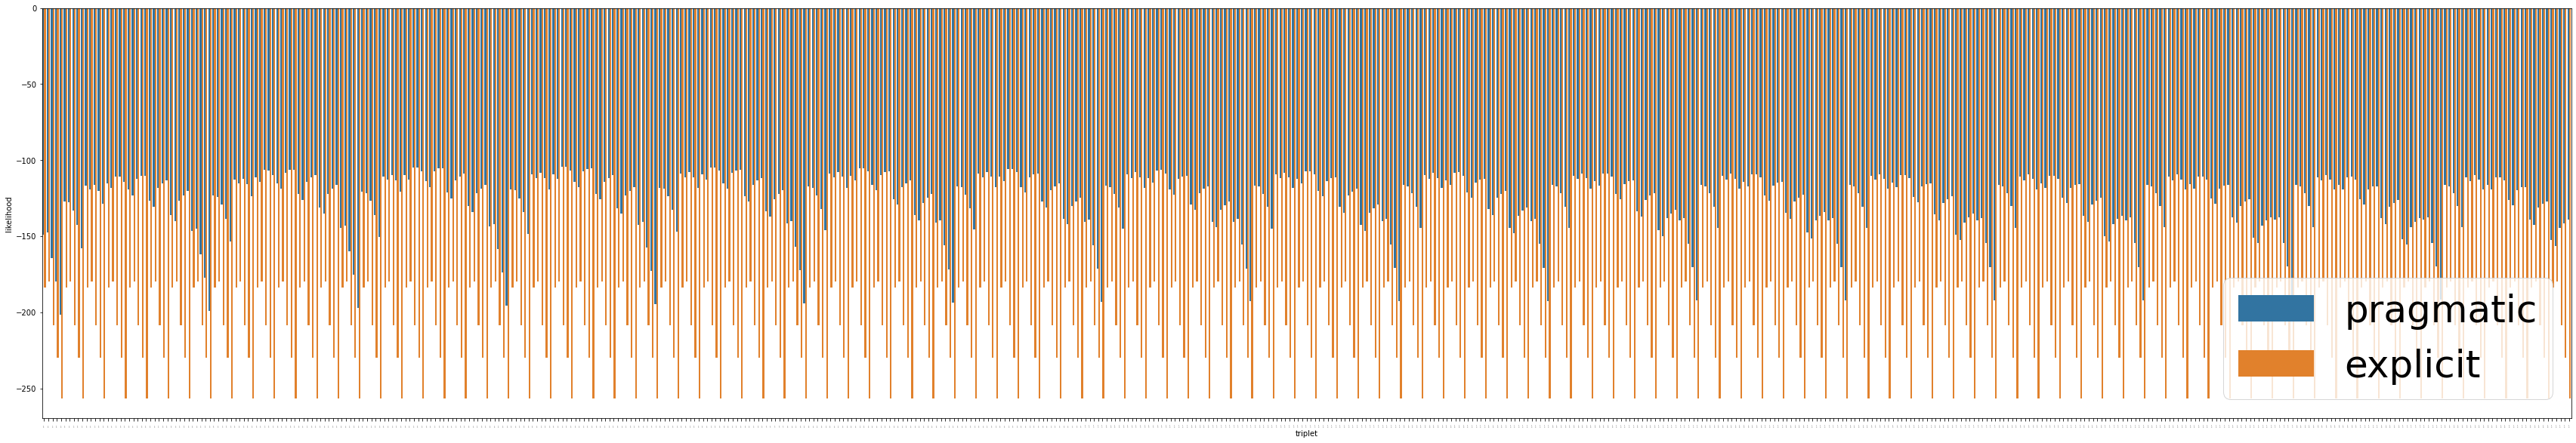

In [52]:
plt.figure(figsize=(60,10))
sns.barplot(x="triplet", y="likelihood", hue="answererType", data=data)
plt.xticks(rotation=90, size=0)
plt.legend(prop={'size':50})
plt.show()

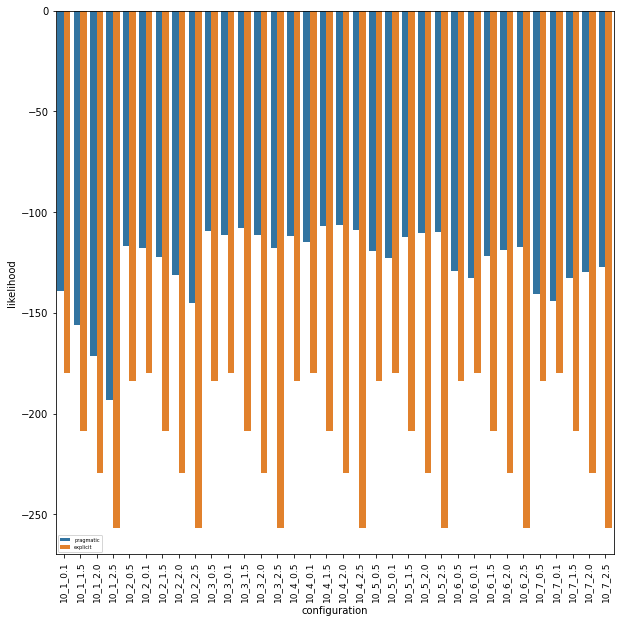

In [53]:
subset = data.loc["10_1_0.1":"10_7_2.5"]
plt.figure(figsize=(10,10))
sns.barplot(x=subset.index, y="likelihood", hue="answererType", data=subset)
plt.xticks(rotation=90, size=9)
plt.legend(prop={'size':5})
plt.show()

In [54]:
data[data.likelihood==max(data['likelihood'])]

,answererType,alpha_q,alpha_a,beta,likelihood,triplet
configuration,,,,,,
6_4_1.5,pragmatic,6,4,1.5,-104.409213,6_4_1.5


In [55]:
# plt.figure(figsize=(50,10))
# sns.barplot(x="triplet", y="likelihood", hue="answererType", data=data[data.answererType=='pragmatic'])
# plt.xticks(rotation=90, size=10)
# plt.show()